# Project: Spaceship Titanic

In this project our task is to predict whether a passenger was transported  
to an alternate dimension during the Spaceship Titanic's collision with  
the spacetime anomaly. To help make these predictions, we are given a set of  
personal records recovered from the ship's damaged computer system

#### Libraries that will be used in project

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functions_sandbox as sand
import scipy.stats as stats
from sklearn.impute import SimpleImputer
from sklearn.metrics import mutual_info_score

In [89]:
# Path to train and test files
path_train = r"D:\IT_projects\Turing_Colledge\Modul3\Sprint3\project\train.csv"
path_test = r"D:\IT_projects\Turing_Colledge\Modul3\Sprint3\project\test.csv"

# Get panda's dataframe and shape
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)
print(f"Train df shape: {train.shape}")
print(f"Test df shape: {test.shape}")

Train df shape: (8693, 14)
Test df shape: (4277, 13)


In [90]:
train.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [91]:
test.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus


We shall look at basic structure of dataframe

In [92]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


There are 3 data types: object(7), float(6) and boolean (target). 13 columns of  
features and 1 target named "Transported"

## Data cleaning

*For the following steps of data cleaning: data will be cleaned only for train  
df but every change in dataframe (columns, labels, etc.) will be added for test  
df when latter is used*

First of all let's make all letters in columns labels to lower case, remove  
empty spaces in order to simplicity and convenience. Also check for duplicates,  
NaN numbers and empty cells

In [93]:
train_df = sand.cleaner(train)

All columns empty spaces have been stripped.
All columns names have been converted to lowercase.

Is there any duplicates?: False
Is there any NaN numbers?: True
Is there any empty cells?: False


Function says that there are some NaNs in df. These must be evaluated and  
fixed. Firstly, we need to find which features have NaNs

In [94]:
nans = train_df.isna().sum()
percentage = (nans / len(train_df)) * 100
pd.DataFrame({"nan_count": nans, "perentage(%)": round(percentage, 2)})

,nan_count,perentage(%)
passengerid,0,0.00
homeplanet,201,2.31
cryosleep,217,2.50
cabin,199,2.29
destination,182,2.09
age,179,2.06
vip,203,2.34
roomservice,181,2.08
foodcourt,183,2.11
shoppingmall,208,2.39


Most of features on average have ~2% NaNs. We need to fill  empty spaces (NaNs)  
of each column. To fill numeric values, I am using mean value of column and for  
categorical - imputation methon with SimpleIputer function 

In [95]:
# create imputer variables for numeric and categoric features
numerical_imp = SimpleImputer(strategy="mean")
categorical_imp = SimpleImputer(strategy="most_frequent")
numericals = ["age", "roomservice", "foodcourt", "shoppingmall", "spa", "vrdeck"]
categoricals = ["homeplanet", "cryosleep", "cabin", "destination", "vip", "name"]

# fill empty cells using imputation method
train_df[numericals] = numerical_imp.fit_transform(train_df[numericals])
train_df[categoricals] = categorical_imp.fit_transform(train_df[categoricals])

train_df.isna().any().any()
# Issiaiskinti ar tikrai galima fillinti cabin su most frequent nes keista
# kai random toje pacioje kabinoje skirtingi zmones butu???????

False

As we can see from function .any().any() there are no NaNs left meaning we  
successfully filled empty cells

Now we can check numeric values with .describe() to look deeper in numeric  
data

In [96]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,8693.0,28.827930,14.339054,0.0,20.0,27.0,37.0,79.0
roomservice,8693.0,224.687617,659.739364,0.0,0.0,0.0,78.0,14327.0
foodcourt,8693.0,458.077203,1594.434978,0.0,0.0,0.0,118.0,29813.0
shoppingmall,8693.0,173.729169,597.417440,0.0,0.0,0.0,45.0,23492.0
spa,8693.0,311.138778,1124.675871,0.0,0.0,0.0,89.0,22408.0
vrdeck,8693.0,304.854791,1133.259049,0.0,0.0,0.0,71.0,24133.0


We can see that all of numeric features have relatively high values in mean and  
even higher in std. Since float type is usually used for smaller numbers or  
strong accuracy, with these numbers float doesn't has huge impact and it could  
be converted to integer. Age feature is usually written in int dtype and can be  
converted too

In [97]:
# converting from float to int
train_df[numericals] = train_df[numericals].astype(int)

## Exploratory Data Analysis (EDA)

Since dataset has been fairly cleaned, some insights could be looked for to  
get deeper view. Firstly, we can check our main project's target  
feature - Transported 

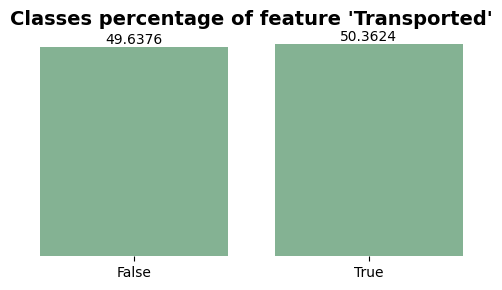

In [98]:
sand.f_countplot(
    data=train_df, 
    xaxis="transported",
    stat="percent", 
    title="Classes percentage of feature 'Transported'"
)

As we can see from plot, both values percent are very similar showing strong  
indicator of strongly balanced classes. This  could be benefit on ML modeling  
part

#### Numeric data

We can look at distribution of age combined with hued target

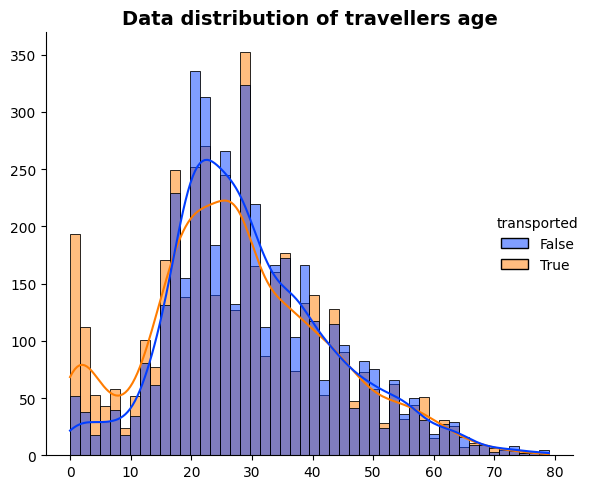

In [99]:
sand.f_displot(
    data=train_df,
    xaxis="age",
    hue="transported",
    palette="bright",
    kde=True,
    title="Data distribution of travellers age"
)

From distribution plot we can see that data isn't normally distributed. People  
0-15 age were more likely to be transported. Most of the travellers were on  
age interval 20-30 as well as higher number of which weren't transported. From  
age 40 to 80 transported and untransported people count was fairly similar

We can look at other continuous numeric features too

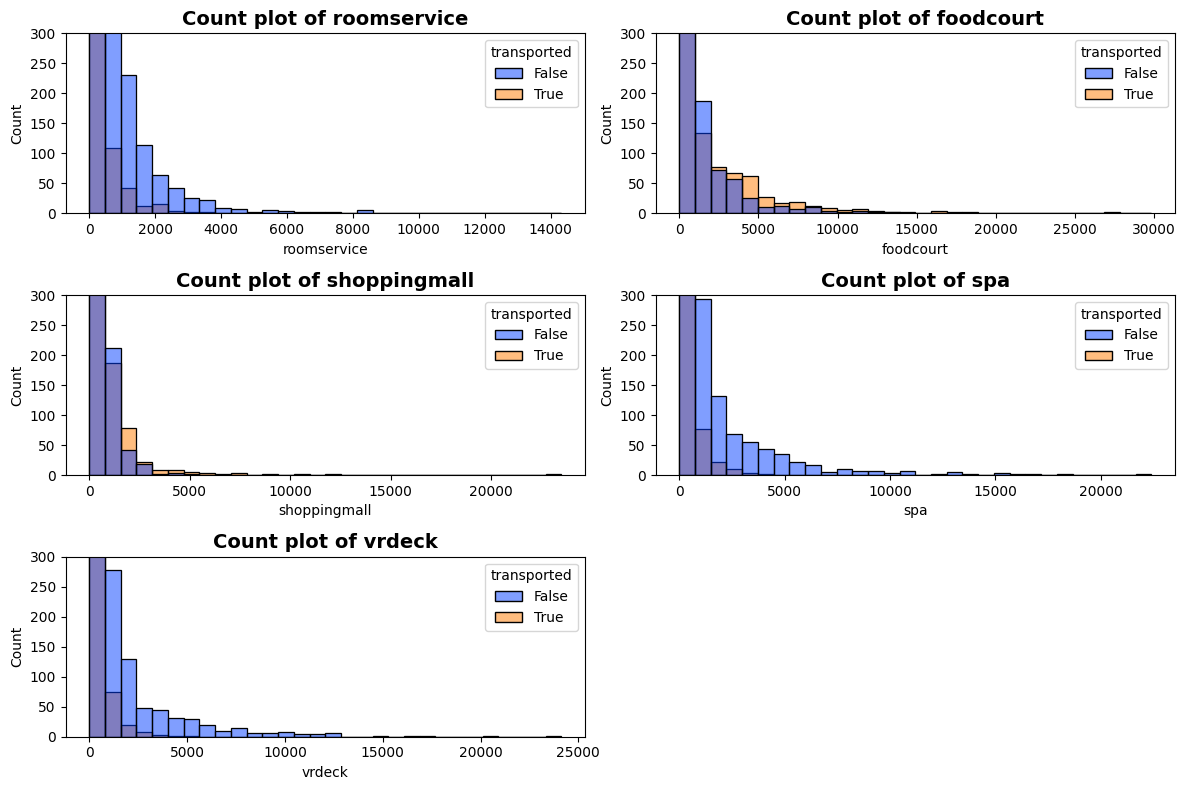

In [119]:
def num_mult(df):
    multiple_numeric = ["roomservice", "foodcourt", "shoppingmall", "spa", "vrdeck"]
    fig, ax = plt.subplots(3, 2, figsize=(12, 8))
    ax = ax.flatten()
    for i, col in enumerate(multiple_numeric):
        sns.histplot(data=df, x=col, bins=30, ax=ax[i], palette="bright", hue="transported")
        ax[i].set_title(f"Count plot of {col}", size=14, fontweight="bold", ha="center")
        ax[i].set_ylim(top=300)
    if len(multiple_numeric) < len(ax):
        fig.delaxes(ax[-1])
    plt.tight_layout()

    plt.show()
num_mult(train_df)

From these plots we can take some of insights:  
- Most of the data for each service are 0 or near it  
- With increasing money spend, amount of count drops dramatically  
- It can be said that increased money spend to spa, foodcourt or other service  
doesn't increase possibility to be transported
- It is important to say that highly skewed data can affect the performance of  
ML models. Here we have 5 highly skewed to the right features with long tails.  
This problem could be mitigated by applying transformation technique to make  
data more symetric. To our data it will be benefit to use Log transformation  
due to long data tails. We will tranform in feature engineering part

#### Categorical data

Now take a look at categorical data. I didn't included here PassengerId,  
Name since these features doesn't have impact to analysis quality. Also, for  
this moment I excluded feature named Cabin, because I will transform this  
feature into more usable and informative on feature engineering part

In [101]:
cat = ["homeplanet", "cryosleep", "destination", "vip", "name"]
train_df[cat].nunique()

homeplanet        3
cryosleep         2
destination       3
vip               2
name           8473
dtype: int64

We have 3 home planets, 2 different cryosleep classes, 3 destinations, 2 vips  
and many different names. We can look how these are distributed

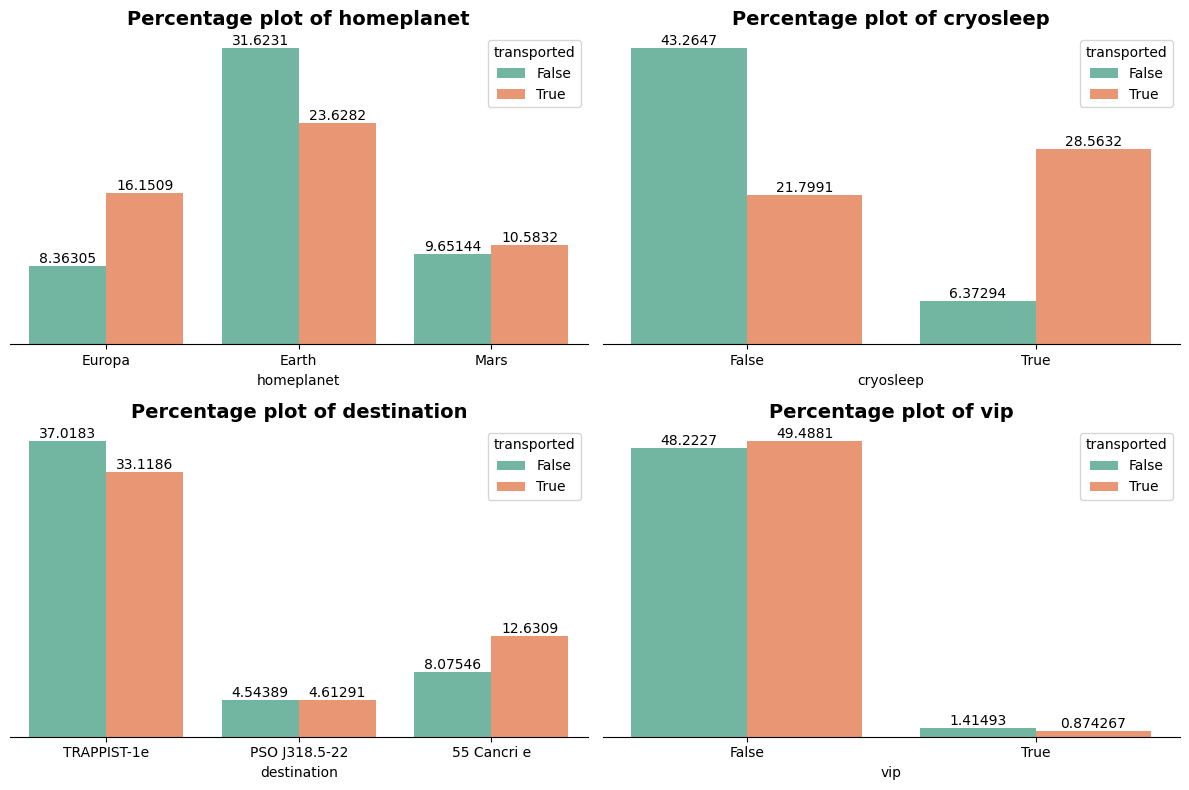

In [102]:
categorics = train_df[cat].drop(columns=["name"])
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax = ax.flatten()
for axis, col in zip(ax, list(categorics.columns)):
    sns.countplot(
        data=categorics,
        x=col,
        ax=axis,
        hue=train_df["transported"],
        stat="percent",
        palette="Set2",
    )
    for container in axis.containers:
        axis.bar_label(container, padding=0)
    axis.axes.get_yaxis().set_visible(False)
    axis.axes.get_xaxis().set_visible(True)
    axis.spines["top"].set_visible(False)
    axis.spines["right"].set_visible(False)
    axis.spines["left"].set_visible(False)
    axis.set_xlabel(col)
    axis.set_ylabel("Count")
    axis.set_title(f"Percentage plot of {col}", size=14, fontweight="bold", ha="center")
if len(list(categorics.columns)) < len(ax):
    fig.delaxes(ax[-1])
plt.tight_layout()

plt.show()

From these plots we can see interesting data:  
- Most of the people are from planet Earth. People whose home planet is Europa,  
transported count is two times more
- More people tend not to use cryosleep but those who chose, almost 5 times  
more were transported
- About 70% of travellers destination was "TRAPPIST-1e". Target's class balance  
is similar to all 3 destinations. Only "55 Cancri e" difference is a little  
higher
- About 2% of travellers chose VIP but it didn't increase possibility to be  
transported as bars show
- Homeplanet and Cryosleep could be very useful features for modelling while  
VIP doesn't have almost any possitive impact for ML 

#### Feature engineering

Now we can engineer more features from current ones to increase different point  
of views for model to decide

Let's make 4 classes for new feature age_cl

In [103]:
train_df["age_cl"] = 0
train_df["age_cl"] = np.where(
    train_df["age"] <= 10,
    "0-10",
    np.where(
        train_df["age"] <= 20,
        "11-20",
        np.where(
            train_df["age"] <= 30,
            "21-30",
            np.where(
                train_df["age"] <= 40,
                "31-40",
                np.where(train_df["age"] <= 50, "41-50", "50+"),
            ),
        ),
    ),
)
train_df.drop(columns=["age"], inplace=True)
train_df["age_cl"].unique()

array(['31-40', '21-30', '50+', '11-20', '41-50', '0-10'], dtype=object)

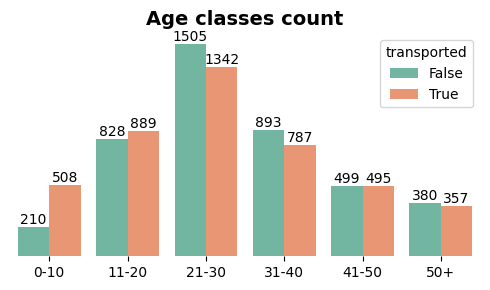

In [104]:
order = ["0-10", "11-20", "21-30", "31-40", "41-50", "50+"]
sand.f_countplot(
    data=train_df,
    xaxis="age_cl",
    hue="transported",
    title="Age classes count",
    palette="Set2",
    order=order,
)

From new class we can see that more than half people were transported of class  
"age_0-10" as well as slightly more in group 11-20, meaning that children was  
priority to save. Other classes have less numbers of transported people

In [105]:
train_df.head(3)

,passengerid,homeplanet,cryosleep,cabin,destination,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,age_cl
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,False,0,0,0,0,0,Maham Ofracculy,False,31-40
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,False,109,9,25,549,44,Juanna Vines,True,21-30
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,True,43,3576,0,6715,49,Altark Susent,False,50+


As I mentioned before, I've left feature cabin for transformation. We will make  
3 new features: deck, cabin_num, side. This transformation should be useful  
because it might show new isights of data

In [106]:
train_new = train_df.copy()

# column split to 3 new columns
split_df = train_df["cabin"].str.split("/", expand=True)
split_df.columns = ["cabindeck", "cabinnum", "cabinside"]

# join two dataframes to one
train_new = pd.concat([train_df, split_df], axis=1)
train_new.drop(columns=["cabin"], inplace=True)
train_new.head(3)

,passengerid,homeplanet,cryosleep,destination,vip,roomservice,foodcourt,shoppingmall,spa,vrdeck,name,transported,age_cl,cabindeck,cabinnum,cabinside
0,0001_01,Europa,False,TRAPPIST-1e,False,0,0,0,0,0,Maham Ofracculy,False,31-40,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,False,109,9,25,549,44,Juanna Vines,True,21-30,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,True,43,3576,0,6715,49,Altark Susent,False,50+,A,0,S


In [107]:
train_new["cabinnum"] = train_new["cabinnum"].astype(int)

Herein we added 3 new columns. Also, I changed cabin_num dtype from object  
to integer. Now we can see how new data looks

In [108]:
# Count unique values in each column
for i in ["cabindeck", "cabinnum", "cabinside"]:
    print(f"We have unique {i}: {train_new[i].nunique()}")

We have unique cabindeck: 8
We have unique cabinnum: 1817
We have unique cabinside: 2


Let's look travellers choice for cabins and as well VIP people per cabin

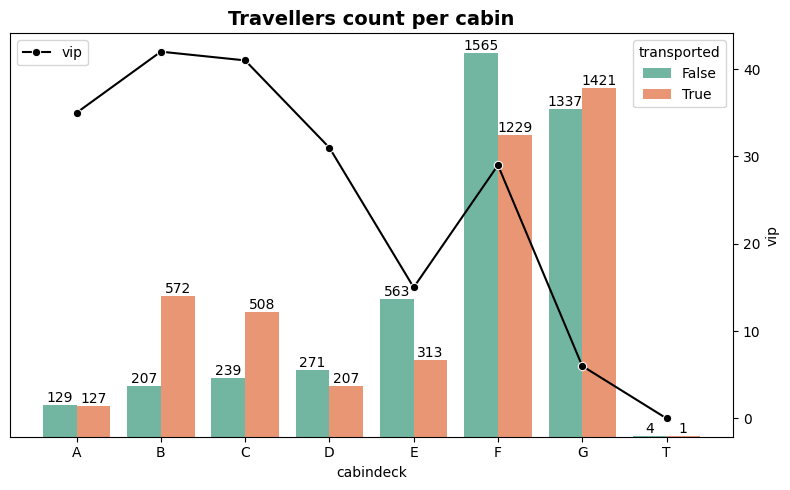

In [109]:
plt.figure(figsize=(8, 5))
cdeck_ord = sorted(train_new["cabindeck"].unique())
cnt = sns.countplot(
    data=train_new, x="cabindeck", hue="transported", palette="Set2", order=cdeck_ord
)
for container in cnt.containers:
    cnt.bar_label(container)
cnt.axes.get_yaxis().set_visible(False)
cnt.axes.get_xaxis().set_visible(True)
cnt.set_frame_on(False)
plt.title("Travellers count per cabin", size=14, fontweight="bold", ha="center")

lin = sns.lineplot(data=train_new, x="cabindeck", y="vip", ax=cnt.twinx(), label="vip", marker="o", color="black", errorbar=None, estimator="sum")
lin.legend(loc="upper left")
plt.tight_layout()
plt.show()

We can see that most popular cabins are "F" and "G" class. These might be  
most affordable. Also, two times more travellers were transported from "B" and  
"C" cabins. By looking at vip traveller line, we can see that highest number  
of vips are at A-D cabins where B is the most vips holding cabin

In [110]:
from sklearn.preprocessing import LabelEncoder

cats = train_new.select_dtypes(include=["object"])
le = LabelEncoder()
train_new_encoded = train_new.copy()
for col in cats.columns:
    train_new_encoded[col] = le.fit_transform(train_new_encoded[col])

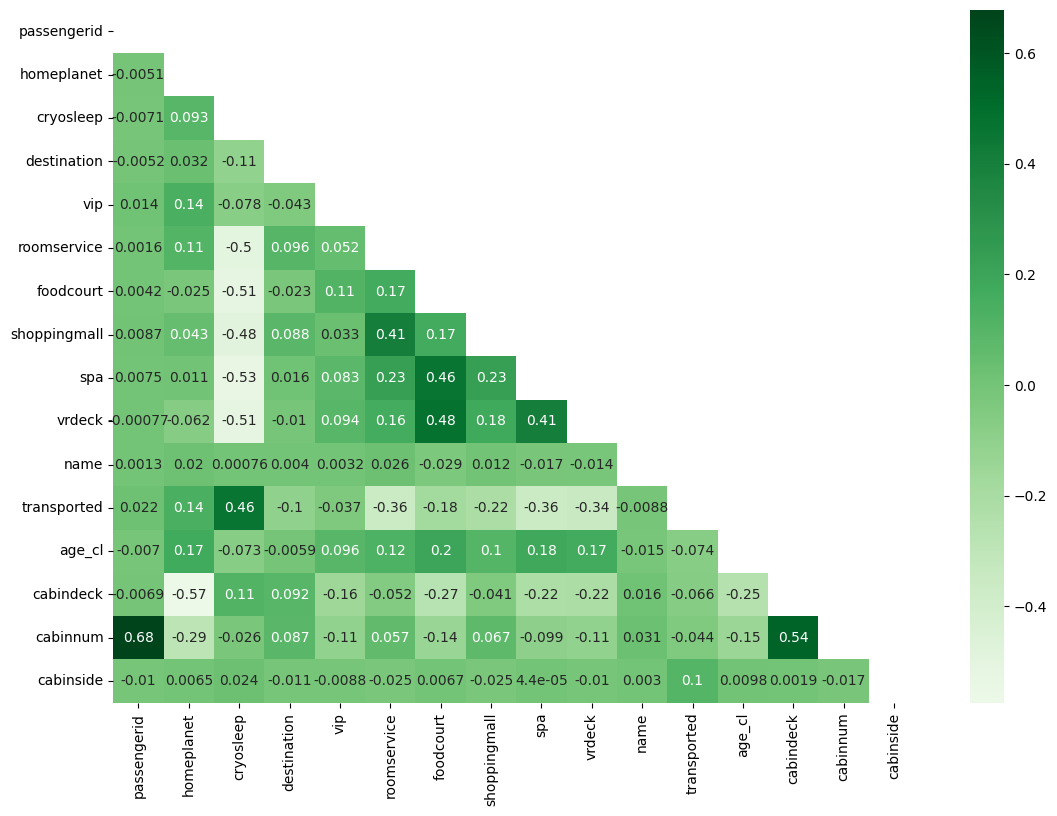

In [111]:
spearmans_corr = train_new_encoded.corr(method="spearman")
sand.f_heatmap(spearmans_corr, figsize=(13, 9))

As mentioned at the numeric data EDA part, we have very skewed data which  
could be tranformed using Log transformation to increase ML models performance

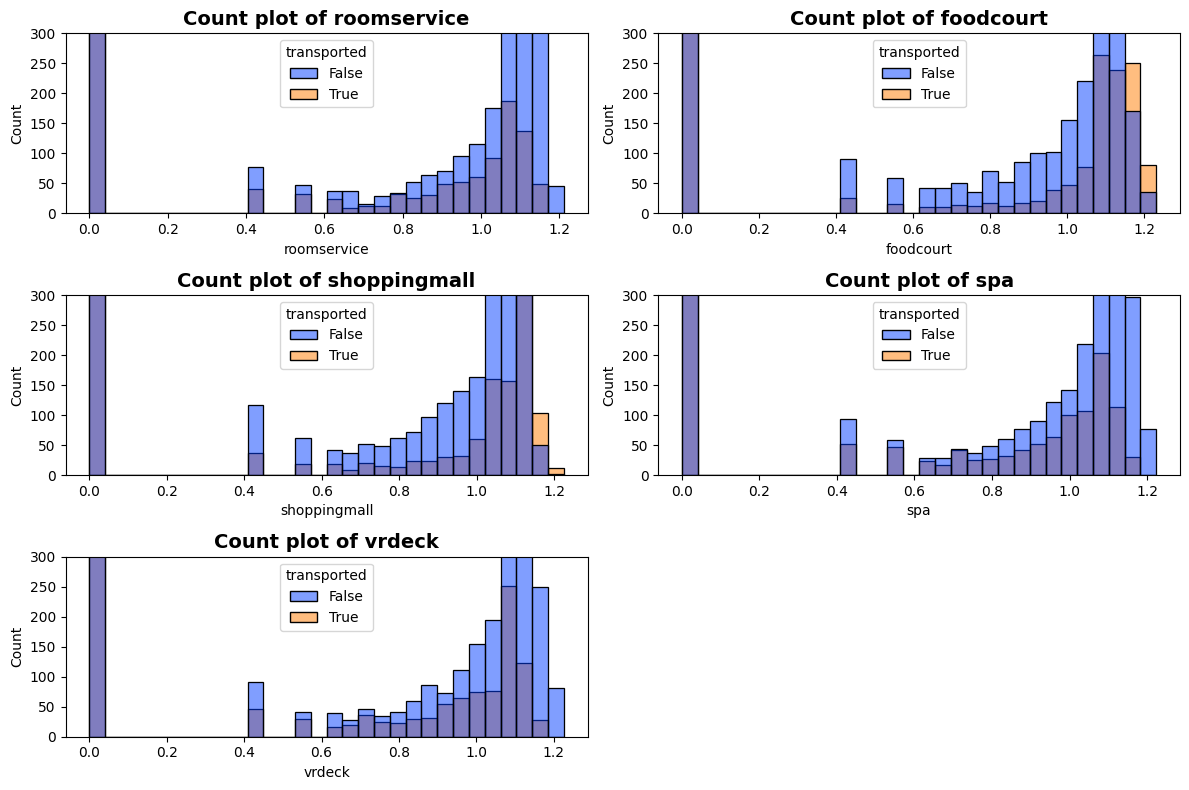

In [121]:
train_new["roomservice"] = np.log1p(train_new["roomservice"])
train_new["foodcourt"] = np.log1p(train_new["foodcourt"])
train_new["shoppingmall"] = np.log1p(train_new["shoppingmall"])
train_new["spa"] = np.log1p(train_new["spa"])
train_new["vrdeck"] = np.log1p(train_new["vrdeck"])
num_mult(train_new)

As we can see, there are less skewness in plots which should help ML models  
to increase performance at the end 

I will check categorical features degree of dependency on target variable by  
using mutual info score function. Higher values means higher dependency. It  
implies that we can get better prediction on target variable

In [113]:
categoricals = train_new.select_dtypes(include=["object"])
def cat_mut_inf(series):
    return mutual_info_score(series, train_new["transported"])

scores_cat = categoricals.apply(cat_mut_inf)
scores_cat = (scores_cat
              .sort_values(ascending=False)
              .to_frame(name="mutual_info_score"))
scores_cat

,mutual_info_score
passengerid,0.693121
name,0.675740
cryosleep,0.112254
cabindeck,0.023149
homeplanet,0.018581
age_cl,0.008396
destination,0.006113
cabinside,0.005149
vip,0.000700


We can see that passengerid and name have strong impact to our target feature.  
Third place is cryosleep. These features could be used for further  
investigation

We can also check multicollinearity of numeric features using Variance  
Inflation Factor (VIF). Having VIF > 10 suggests there is high correlation with  
other features. This would help us decrease redundancy of features

In [117]:
numericals = train_new.select_dtypes(include=["number"])
sand.calc_vif(numericals)

,variables,VIF
1,foodcourt,2.106718
3,spa,2.084609
4,vrdeck,2.012328
0,roomservice,1.819645
2,shoppingmall,1.819365
5,cabinnum,1.473642


By having small VIF factors (< 3) we can be assure that numeric features does  
not correlate between each other. It helps to prevent from reduced model  
interpretability or increaced variance

#### Preprocessing